# GAN Classification

### Libraries

In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout, LeakyReLU, Conv2D, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

## Model

In [16]:
def build_discriminator(img_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=3, strides=2,
              input_shape=img_shape, padding="same"))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(num_classes, activation='softmax'))

    img = Input(shape=img_shape)
    validity = model(img)

    return Model(img, validity)

## Training & Fit

In [17]:
img_shape = (28, 28, 1)
num_classes = 10
discriminator = build_discriminator(img_shape, num_classes)
discriminator.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(0.0002, 0.5),
    metrics=['accuracy']
)

In [31]:
discriminator.summary

<bound method Model.summary of <keras.src.engine.functional.Functional object at 0x000001FF3B941050>>

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
history = discriminator.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1  # Add some validation to monitor overfitting/underfitting
)

In [20]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))
history

60000
10000
60000
10000


In [30]:
# Preprocess the data by reshaping and normalizing
x_test = np.expand_dims(x_test, axis=-1)

# Evaluating the model
loss, accuracy = discriminator.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 4.3500 - accuracy: 0.1135
Test Accuracy: 11.35%


## Testing

313/313 [==============================] - 1s 3ms/step


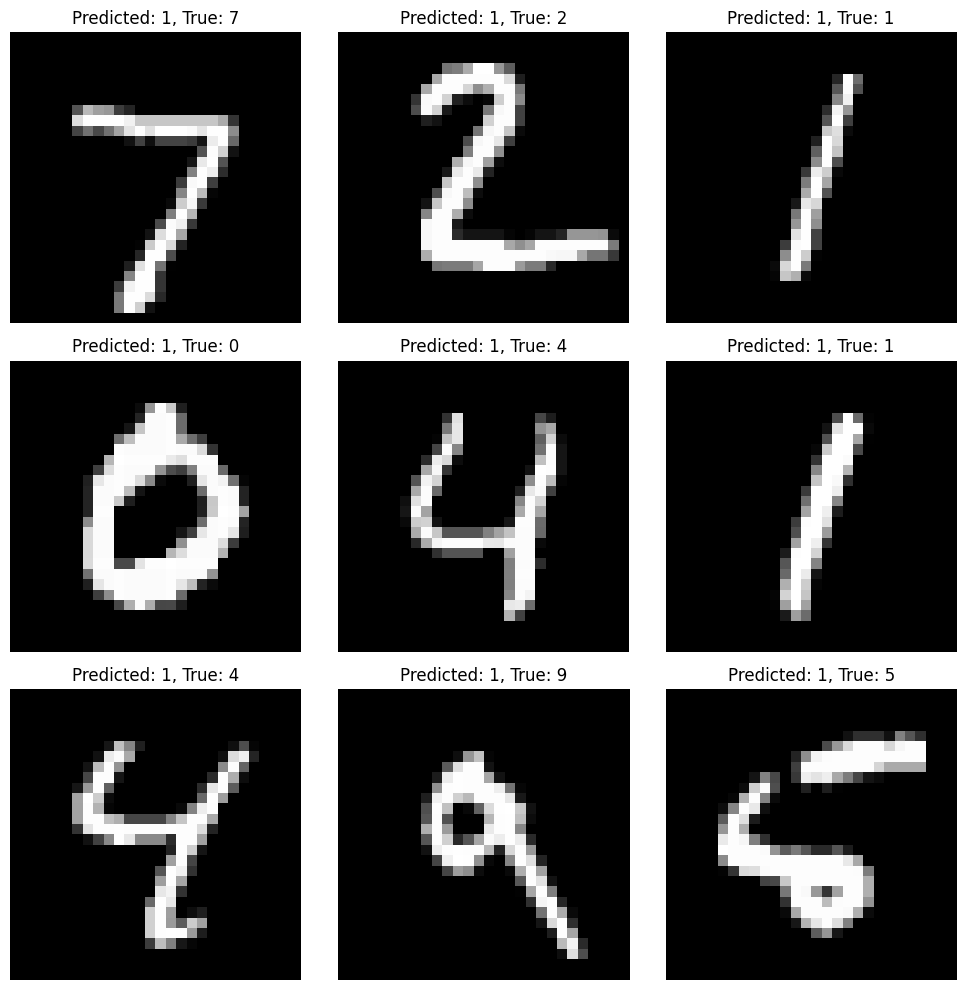

In [22]:
predictions = discriminator.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Plotting test images along with the predicted and true labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}, True: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

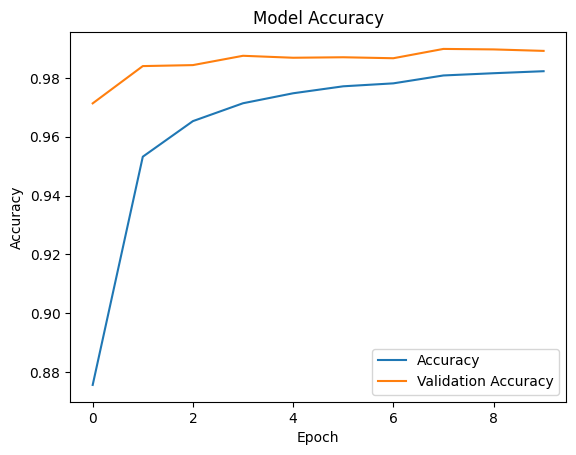

In [26]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

313/313 [==============================] - 1s 3ms/step


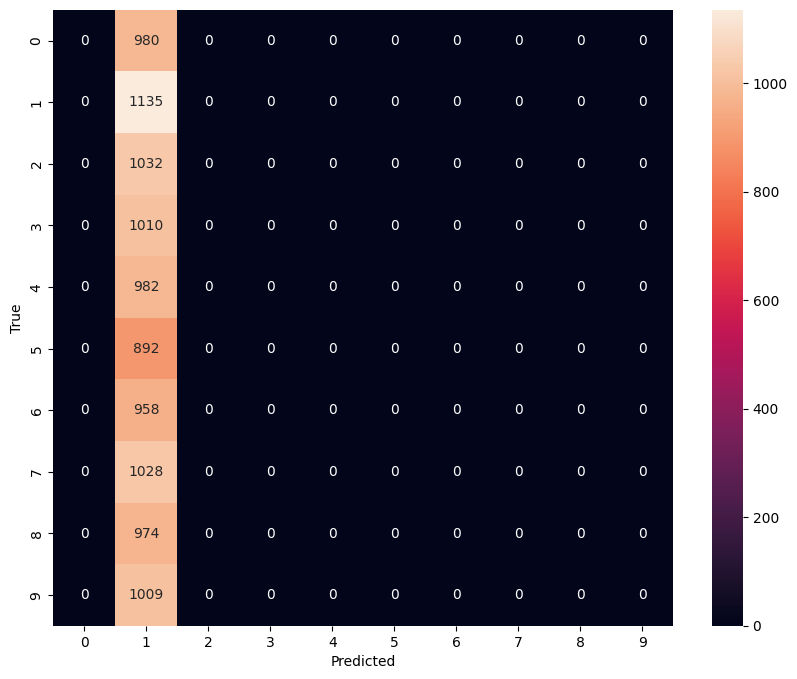

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000



c:\Users\iamva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\iamva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\iamva\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [27]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

predictions = discriminator.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Plotting a confusion matrix

cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Detailed classification report
print(classification_report(y_test, predicted_classes))